<a href="https://colab.research.google.com/github/divya374r1/Neural-Network-and-Deep-Learning/blob/main/Handwritten_digit_recognition_program_using_a_fully_connected_neural_network_(Dense_layers)_on_the_MNIST_dataset_(Image%2CONE_Digit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8834 - loss: 0.4249
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9641 - loss: 0.1224
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9751 - loss: 0.0836
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9824 - loss: 0.0580
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0854
Test Accuracy: 0.9776999950408936
Enter the image path (example: digit.png): /content/digit.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted Digit = 5


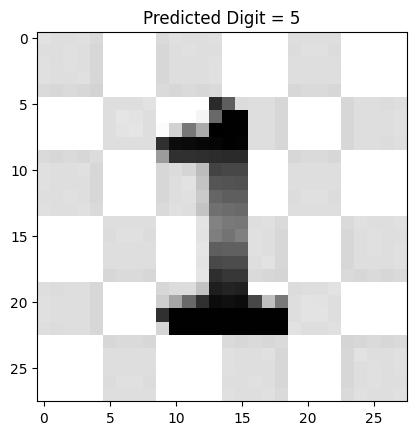

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import cv2
import numpy as np
import warnings

# Suppress specific Keras UserWarnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.layers.reshaping.flatten')

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Build the model
model = models.Sequential([
    tf.keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train
model.fit(x_train, y_train, epochs=5)

# 6. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)
# ---------- USER INPUT PART ----------
# User gives the image path
img_path = input("Enter the image path (example: digit.png): ")

# Load the image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize to 28x28
img = cv2.resize(img, (28, 28))

# Normalize
img = img / 255.0

# Convert to array shape (1, 28, 28)
img = np.array(img).reshape(1, 28, 28)

# Predict
prediction = model.predict(img)
predicted_digit = prediction.argmax()

print("Predicted Digit =", predicted_digit)

# Show the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title("Predicted Digit = " + str(predicted_digit))
plt.show()